# Data Storytelling

# Arlington Housing Price Prediction Data Wrangling and Storytelling 
                                                                                                             By Gbatchin Kochoni

## Exploring Home Price Trends in Arlington, VA

### Objective
To explore and visualize the historical housing price data for Arlington, Virginia using Zillow All Homes dataset, with the goal of identifying key trends and insights that inform investment or policy decisions.

### Key Questions
- How have home prices in Arlington evolved over time?
- Are there seasonal or structural trends in the data?
- What hypotheses can we make about future housing prices?

### Hypothesis
We hypothesize that Arlington has experienced consistent growth in housing prices since 2015, with possible seasonal variations.


#### Content
1. Introduction
2. Importing necessary libraries
3. Data Acquisition
4. Data wrangling

#### 1. Introduction

##### 1.1 Context

The housing market in Arlington, Virginia, is highly dynamic, influenced by its proximity to Washington, D.C., substantial employment opportunities, and ongoing urban development. The region’s rising home prices and rapid gentrification have drawn interest from prospective homeowners, investors, and policymakers. Understanding and anticipating housing price trends is crucial for making informed real estate decisions, allocating public resources, and planning urban infrastructure.

##### 1.2 Project Goal

This project aims to develop a predictive model for estimating residential home prices in Arlington, Virginia. The model will identify key features influencing home values and forecast future prices using machine learning techniques.


#### 2. Importing necessary libraries

In [5]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt


#### 3 Data Acquisition

In [7]:
# 3.1 Reading the raw file

# Load the dataset
df = pd.read_csv('City_Zhvi_AllHomes.csv')

# 3.2 Initial data preview
print("Initial data preview:")
df.head()


Initial data preview:


,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
0,6181,New York,NY,New York,Queens,1,NaN,NaN,NaN,NaN,...,573600,576200,578400,582200,588000,592200,592500,590200,588000,586400
1,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,2,155000.0,154600.0,154400.0,154200.0,...,558200,560800,562800,565600,569700,574000,577800,580600,583000,585100
2,17426,Chicago,IL,Chicago,Cook,3,109700.0,109400.0,109300.0,109300.0,...,207800,206900,206200,205800,206200,207300,208200,209100,211000,213000
3,13271,Philadelphia,PA,Philadelphia,Philadelphia,4,50000.0,49900.0,49600.0,49400.0,...,122300,121600,121800,123300,125200,126400,127000,127400,128300,129100
4,40326,Phoenix,AZ,Phoenix,Maricopa,5,87200.0,87700.0,88200.0,88400.0,...,183800,185300,186600,188000,189100,190200,191300,192800,194500,195900


#### 4. Data Wrangling

In [9]:
# 4.1 Quick overview of the dataset
info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Columns: 251 entries, RegionID to 2016-08
dtypes: float64(201), int64(46), object(4)
memory usage: 20.5+ MB


We found :

- **Rows**: 10,730

- **Columns**: 251

- **Types**:

    - 4 columns are object (text), mainly **RegionID, RegionName, State, Metro, CountyName**.

    - 46 columns are int64.

    - 201 columns are float64 (mostly the price data by month from 1996-04 to 2016-08).

In [11]:
# 4.2 Checking missing values
missing_values = df.isnull().sum()
missing_values

RegionID        0
RegionName      0
State           0
Metro         471
CountyName      0
             ... 
2016-04         0
2016-05         0
2016-06         0
2016-07         0
2016-08         0
Length: 251, dtype: int64

- **Missing values**:

    - The Metro column has **471 missing values**.

    - Many of the early date columns (especially 1996-1998) have missing home price values (which makes sense for cities with incomplete early data).

Before dealing with this missing values, let's check if Arlington, Virginia (VA) is present in this file and extract that specific data

In [14]:
# 4.3 Extracting specific data for Arlington, VA

arlington_df = df[(df['RegionName'].str.upper() == 'ARLINGTON') & (df['State'] == 'VA')].copy()

print(f"Number of records for Arlington, VA: {arlington_df.shape[0]}")


Number of records for Arlington, VA: 1


In [15]:
# 4.4 Column Check
arlington_df.columns

Index(['RegionID', 'RegionName', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04',
       '2016-05', '2016-06', '2016-07', '2016-08'],
      dtype='object', length=251)

In [16]:
# 4.5 Preview arlington_df
arlington_df.head()

,RegionID,RegionName,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08
95,30258,Arlington,VA,Washington,Arlington,96,186600.0,185000.0,184400.0,183800.0,...,617200,618100,619600,622400,625900,626900,625700,624700,624800,625200


Now the data contains only one row with:

- **Metadata**: RegionID, RegionName, State, Metro, CountyName, SizeRank

- **Price per month**: from 1996-04 to 2016-08

In the following steps, we are going to:

- **Remove** unnecessary columns (e.g., RegionID, State, Metro).

- **Convert** the dates 1996-04, 1996-05, etc. into a Date column

- **Create** a corresponding Price column

Finally, we will obtain a simple DataFrame: [Date, Price].

In [18]:
# 4.6 Restructuring the DataFrame

# 4.6.1 Remove unnecessary columns (e.g., RegionID, State, Metro)
arlington_df = arlington_df.drop(columns=['RegionID', 'SizeRank', 'State', 'Metro', 'CountyName'], errors='ignore')

# 4.6.2 Transpose using 'RegionName' as index
arlington_df = arlington_df.set_index('RegionName').T.reset_index()

# 4.6.3 Rename columns
arlington_df.columns = ['Date', 'Price']

# 4.6.4 Convert 'Date' to datetime
arlington_df['Date'] = pd.to_datetime(arlington_df['Date'], format='%Y-%m')

# 4.6.5 Delete lines where the price is missing
arlington_df = arlington_df.dropna()


In [19]:
#4.7 Re-check missing values
arlington_df.isnull().sum()

Date     0
Price    0
dtype: int64

In [20]:
print("Cleaned and restructured data for Arlington:")

arlington_df.head()

Cleaned and restructured data for Arlington:


,Date,Price
0,1996-04-01,186600.0
1,1996-05-01,185000.0
2,1996-06-01,184400.0
3,1996-07-01,183800.0
4,1996-08-01,183300.0


In [21]:
# 4.8 Summary statistics

print("Descriptive statistics of housing prices in Arlington:")
arlington_df['Price'].describe()


Descriptive statistics of housing prices in Arlington:


count       245.000000
mean     429494.285714
std      152912.510505
min      181300.000000
25%      263400.000000
50%      506300.000000
75%      545700.000000
max      626900.000000
Name: Price, dtype: float64

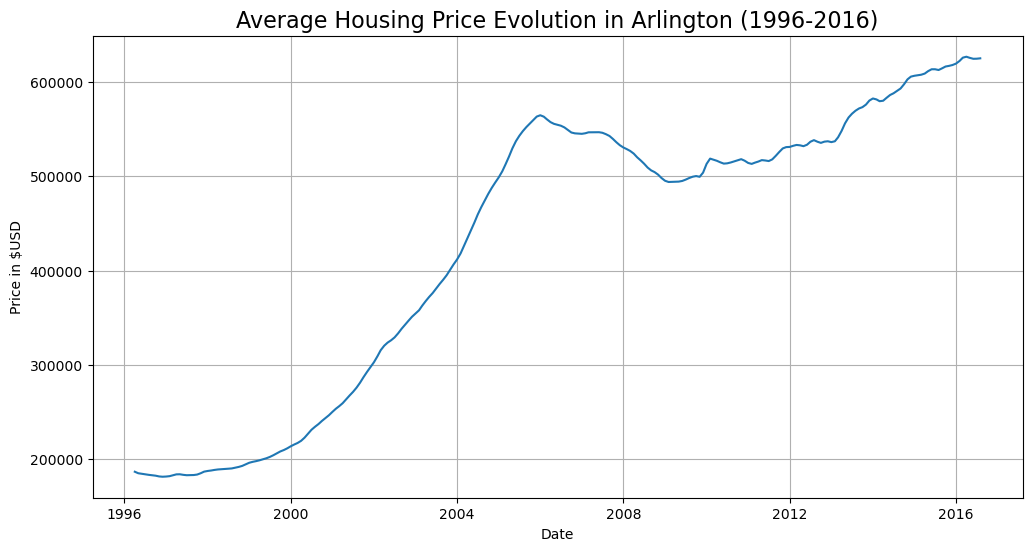

In [22]:
# 4.9 First Graphical Overview

plt.figure(figsize=(12,6))
plt.plot(arlington_df['Date'], arlington_df['Price'])
plt.title("Average Housing Price Evolution in Arlington (1996-2016)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price in $USD")
plt.grid(True)
plt.show()


This concludes the first step: Data Processing. The next step is Exploratory Data Analysis (EDA).

## Conclusion and Next Steps

From our preliminary wrangling and visual exploration:

- Arlington shows a general upward trend in housing prices over the years.
- There may be seasonal fluctuations worth deeper investigation.

### Next Steps:
- Develop predictive models (e.g., time series or regression)
- Incorporate additional features (e.g., economic indicators, neighborhood-level variables)
- Compare with surrounding regions for contextual insight
